In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_path = './data/market-price.csv'
bitcoint_df = pd.read_csv(file_path, names=['day', 'price'])

In [6]:
print(bitcoint_df.shape)

(366, 2)


In [7]:
print(bitcoint_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [8]:
bitcoint_df.tail()

,day,price
361,2021-04-11 00:00:00,59774.00
362,2021-04-12 00:00:00,59964.87
363,2021-04-13 00:00:00,59834.74
364,2021-04-14 00:00:00,63554.44
365,2021-04-15 00:00:00,62969.12


In [9]:
bitcoint_df['day']

0      2020-04-15 00:00:00
1      2020-04-16 00:00:00
2      2020-04-17 00:00:00
3      2020-04-18 00:00:00
4      2020-04-19 00:00:00
              ...         
361    2021-04-11 00:00:00
362    2021-04-12 00:00:00
363    2021-04-13 00:00:00
364    2021-04-14 00:00:00
365    2021-04-15 00:00:00
Name: day, Length: 366, dtype: object

In [10]:
bitcoint_df['day'] = pd.to_datetime(bitcoint_df['day'])

In [11]:
bitcoint_df['day']

0     2020-04-15
1     2020-04-16
2     2020-04-17
3     2020-04-18
4     2020-04-19
         ...    
361   2021-04-11
362   2021-04-12
363   2021-04-13
364   2021-04-14
365   2021-04-15
Name: day, Length: 366, dtype: datetime64[ns]

In [12]:
bitcoint_df.index = bitcoint_df['day']

In [13]:
bitcoint_df.set_index('day', inplace=True)

<AxesSubplot:xlabel='day'>

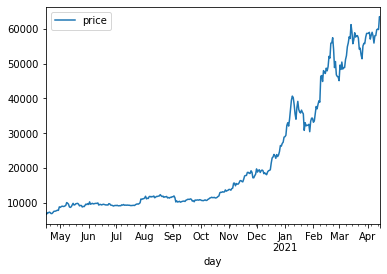

In [14]:
bitcoint_df.plot()

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
import statsmodels.api as sm

In [18]:
model = ARIMA(bitcoint_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  365
Model:  

<AxesSubplot:>

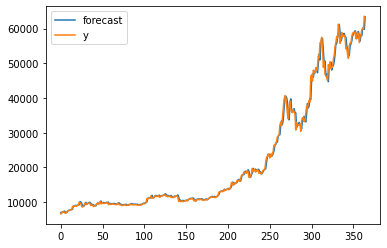

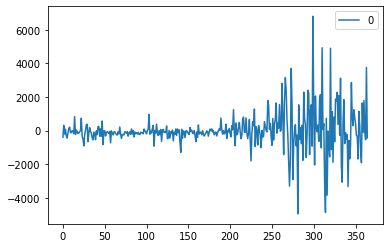

In [20]:
fig = model_fit.plot_predict()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [30]:
forecast_data = model_fit.forecast(steps=10)
test_file_path = './data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

In [31]:
pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.y.values
pred_y_lower = []
pred_y_upper = []
for lower_upper in forecast_data[2]:
  lower = lower_upper[0]
  upper = lower_upper[1]
  pred_y_lower.append(lower)
  pred_y_upper.append(upper)

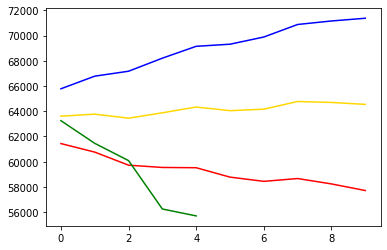

In [32]:
plt.plot(pred_y, color="gold")
plt.plot(pred_y_lower, color="red")
plt.plot(pred_y_upper, color="blue")
plt.plot(test_y, color="green")

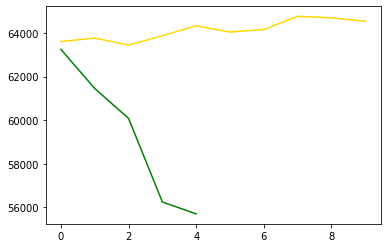

In [33]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color="green")